<a href="https://colab.research.google.com/github/RuckiyathShifa/Heart-disease-prediction/blob/main/Support_Vector_Machine_Fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

heart= pd.read_csv('heart_dataset.csv')

heart.head(2)



,Age,Sex,Chest pain type,Resting blood pressure,Serum cholestoral,Fasting blood sugar,Resting ecg results,Max heart rate achieved,Exercise induced angina,oldpeak,Slope,Number of major vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [ ]:
print(heart.isna().sum())



Age                         0
Sex                         0
Chest pain type             0
Resting blood pressure      0
Serum cholestoral           0
Fasting blood sugar         0
Resting ecg results         0
Max heart rate achieved     0
Exercise induced angina     0
oldpeak                     0
Slope                       0
Number of major vessels     0
thal                        0
target                      0
dtype: int64


In [ ]:

heart


,Age,Sex,Chest pain type,Resting blood pressure,Serum cholestoral,Fasting blood sugar,Resting ecg results,Max heart rate achieved,Exercise induced angina,oldpeak,Slope,Number of major vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
duplicates = heart[heart.duplicated()]
len(duplicates)

723

In [ ]:
heart= heart.drop_duplicates().reset_index()
heart

,index,Age,Sex,Chest pain type,Resting blood pressure,Serum cholestoral,Fasting blood sugar,Resting ecg results,Max heart rate achieved,Exercise induced angina,oldpeak,Slope,Number of major vessels,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


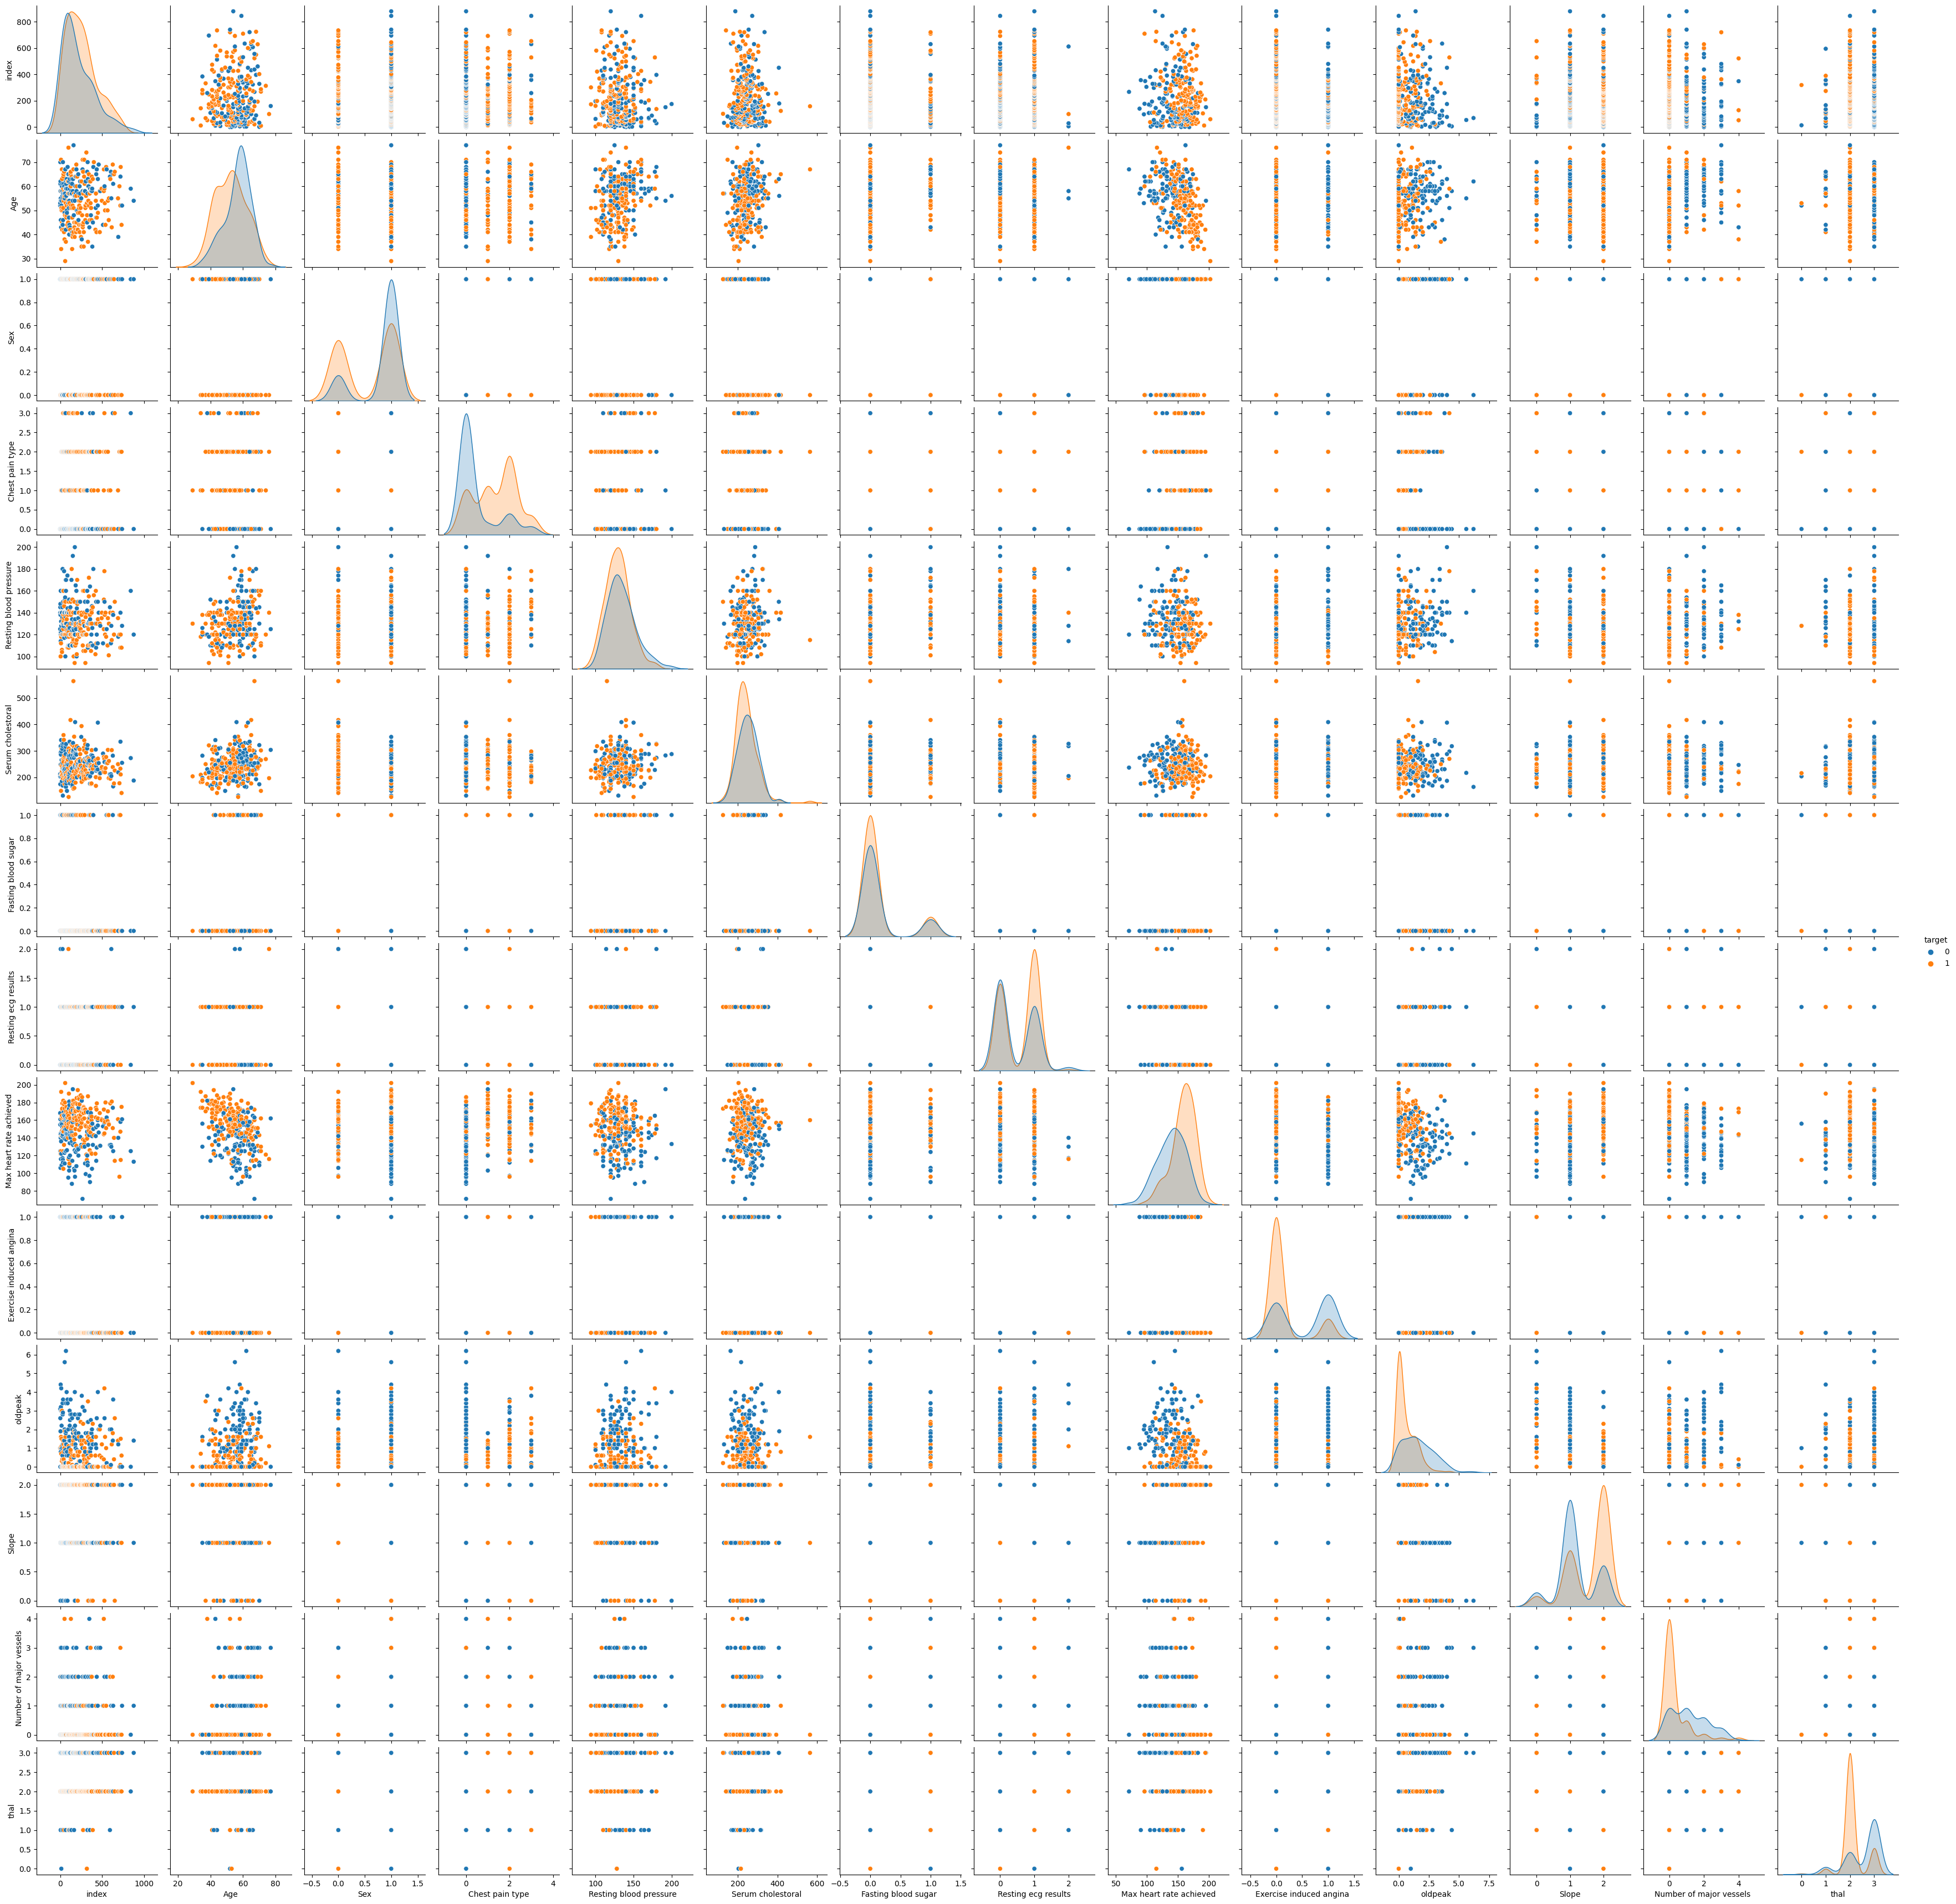

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(data=heart, hue="target")

In [ ]:
heart.target.value_counts()

1    164
0    138
Name: target, dtype: int64

In [ ]:
heart.target.value_counts(normalize = True)

1    0.543046
0    0.456954
Name: target, dtype: float64

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes = list(heart.target.cat.categories), heart = heart.target)
class_weights

TypeError: ignored

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score


In [ ]:
heart.describe()


,index,Age,Sex,Chest pain type,Resting blood pressure,Serum cholestoral,Fasting blood sugar,Resting ecg results,Max heart rate achieved,Exercise induced angina,oldpeak,Slope,Number of major vessels,thal,target
count,302.000000,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,236.304636,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,188.588990,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,0.000000,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,85.500000,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,189.500000,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,342.750000,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,878.000000,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
corr= heart.corr()
corr

,index,Age,Sex,Chest pain type,Resting blood pressure,Serum cholestoral,Fasting blood sugar,Resting ecg results,Max heart rate achieved,Exercise induced angina,oldpeak,Slope,Number of major vessels,thal,target
index,1.000000,0.079946,-0.067371,0.084295,-0.058800,-0.046786,-0.045028,0.068572,-0.025757,-0.153579,-0.081301,0.026168,0.010935,0.016295,0.095044
Age,0.079946,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
Sex,-0.067371,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
Chest pain type,0.084295,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
Resting blood pressure,-0.058800,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
Serum cholestoral,-0.046786,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
Fasting blood sugar,-0.045028,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
Resting ecg results,0.068572,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
Max heart rate achieved,-0.025757,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
Exercise induced angina,-0.153579,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601


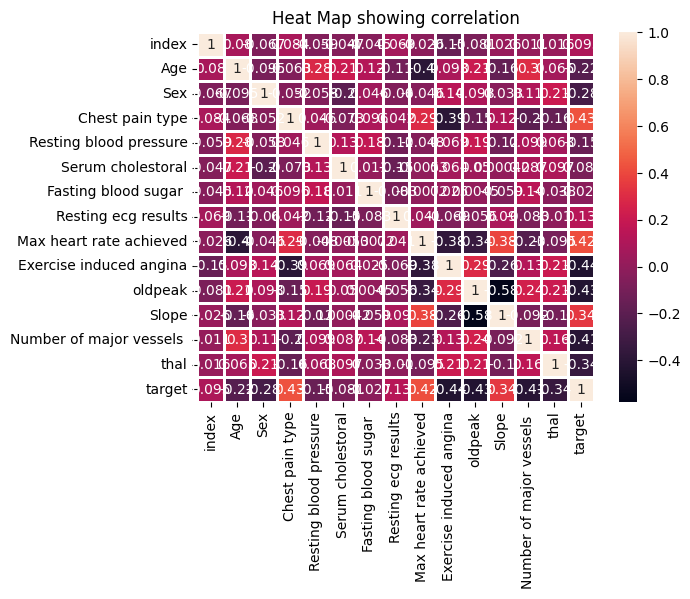

In [ ]:
heat_map = sb.heatmap( corr, linewidth = 1 , annot = True)
plt.title( "Heat Map showing correlation" )
plt.show()

In [ ]:
X= heart.drop('target', axis=1)
y= heart['target']

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_tuning, X_val, y_tuning, y_val = train_test_split(X, heart['target'],
                                                    test_size=0.3, # 70% training and 30% test
                                                    random_state=109)




In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    heart['target'],
                                                    test_size=0.3, # 70% training and 30% test
                                                    random_state=10)


In [ ]:
dc = DummyClassifier(strategy = 'most_frequent')
dc.fit(X,y)

acc = accuracy_score(dc.predict(X),y)

print(f'Baseline accuracy = {acc:.3f}')


Baseline accuracy = 0.543


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components = 2, learning_rate = 'auto', init = 'random', verbose = 1, n_jobs = -1)

In [ ]:
X_embedded = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 302 samples in 0.001s...
[t-SNE] Computed neighbors for 302 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 302 / 302
[t-SNE] Mean sigma: 40.264855
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.564152
[t-SNE] KL divergence after 1000 iterations: 0.335622


In [ ]:
X_embedded.shape

(302, 2)

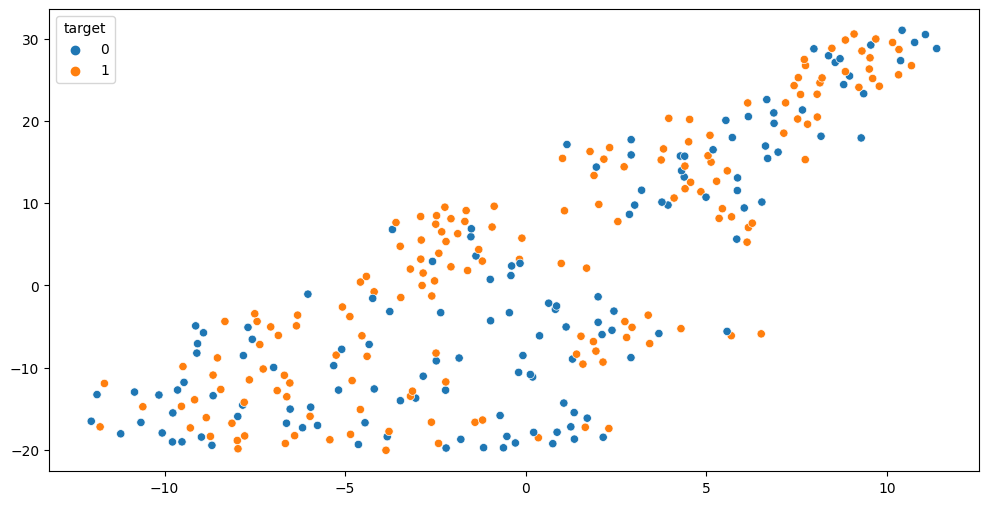

In [ ]:
plt.figure(figsize = (12,6))
sb.scatterplot(x = X_embedded[:,0], y = X_embedded[:,1], hue = y)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

Pipeline(steps=[('scaler', StandardScaler()), ('SVM', SVC(kernel='sigmoid'))])

In [ ]:
param_C_values = [1, 10, 100, 1000]
param_gamma_values = [0.1, 0.01, 0.001, 0.0001]

In [ ]:
param_grid = [
              { 'svc__kernel' : ['linear'],
                'svc__C' : param_C_values
               },
              { 'svc__kernel' : ['poly'],
                'svc__C' : param_C_values,
                'svc__degree' : [2, 3, 4, 5, 6],
                'svc__gamma' : param_gamma_values
              },
              { 'svc__kernel' : ['rbf'],
                'svc__C' : param_C_values,
                'svc__gamma' : param_gamma_values
               }
]

In [ ]:
from sklearn.pipeline import make_pipeline
ml_pipeline = make_pipeline( StandardScaler(), svm.SVC() )
cv_folds = StratifiedKFold(n_splits = 5, shuffle = True)

gs = GridSearchCV(estimator = ml_pipeline,
                  param_grid = param_grid,
                  cv = cv_folds,
                  scoring = 'accuracy',
                  return_train_score = True,
                  verbose = 5)

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END svc__C=1, svc__kernel=linear;, score=(train=0.899, test=0.744) total time=   0.0s
[CV 2/5] END svc__C=1, svc__kernel=linear;, score=(train=0.876, test=0.929) total time=   0.0s
[CV 3/5] END svc__C=1, svc__kernel=linear;, score=(train=0.905, test=0.857) total time=   0.0s
[CV 4/5] END svc__C=1, svc__kernel=linear;, score=(train=0.893, test=0.881) total time=   0.0s
[CV 5/5] END svc__C=1, svc__kernel=linear;, score=(train=0.893, test=0.833) total time=   0.0s
[CV 1/5] END svc__C=10, svc__kernel=linear;, score=(train=0.887, test=0.744) total time=   0.0s
[CV 2/5] END svc__C=10, svc__kernel=linear;, score=(train=0.852, test=0.929) total time=   0.0s
[CV 3/5] END svc__C=10, svc__kernel=linear;, score=(train=0.899, test=0.833) total time=   0.0s
[CV 4/5] END svc__C=10, svc__kernel=linear;, score=(train=0.882, test=0.905) total time=   0.0s
[CV 5/5] END svc__C=10, svc__kernel=linear;, score=(train=0.911, test=0.833) t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid=[{'svc__C': [1, 10, 100, 1000],
                          'svc__kernel': ['linear']},
                         {'svc__C': [1, 10, 100, 1000],
                          'svc__degree': [2, 3, 4, 5, 6],
                          'svc__gamma': [0.1, 0.01, 0.001, 0.0001],
                          'svc__kernel': ['poly']},
                         {'svc__C': [1, 10, 100, 1000],
                          'svc__gamma': [0.1, 0.01, 0.001, 0.0001],
                          'svc__kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy', verbose=5)

In [ ]:
gs.best_score_


0.8724252491694353

In [ ]:
best_model_params = gs.best_params_
best_model_params


{'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

In [ ]:
best_model = make_pipeline( StandardScaler(), svm.SVC(C=100, gamma=0.01,kernel='rbf') )

In [ ]:
best_model.set_params(**best_model_params)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100, gamma=0.01))])

In [ ]:
best_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100, gamma=0.01))])

In [ ]:
best_model.score(X_test, y_test)

0.7582417582417582

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


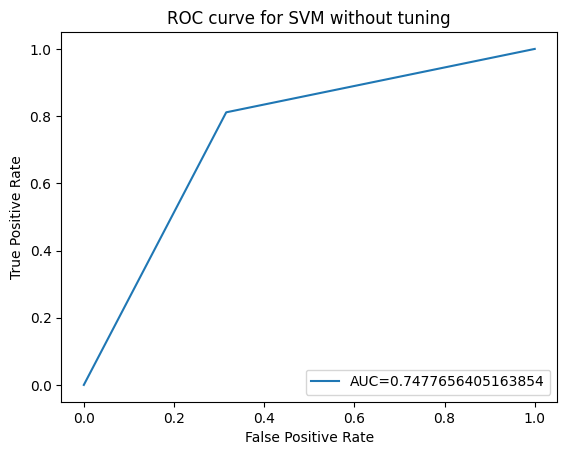

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, best_model.predict(X_test))
auc = metrics.roc_auc_score(y_test, best_model.predict(X_test))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC curve for SVM without tuning')
plt.show()

In [ ]:

print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70        38
           1       0.78      0.81      0.80        53

    accuracy                           0.76        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91



In [ ]:
#Create many svm Classifier, one classifier for each kernel
pipe_lnr = Pipeline([('scaler', StandardScaler()), ('SVM',svm.SVC(kernel='linear'))]) # Linear Kernel
pipe_ply = Pipeline([('scaler', StandardScaler()), ('SVM',svm.SVC(kernel='poly'))]) # Polynomial Kernel
pipe_rbf = Pipeline([('scaler', StandardScaler()), ('SVM',svm.SVC(kernel='rbf'))]) # Radial Basis Function Kernel - Default value
pipe_sgm = Pipeline([('scaler', StandardScaler()), ('SVM',svm.SVC(kernel='sigmoid'))]) # Sigmoid Kernel


In [ ]:
pipe_lnr.fit(X_tuning, y_tuning)
pipe_ply.fit(X_tuning, y_tuning)
pipe_rbf.fit(X_tuning, y_tuning)
pipe_sgm.fit(X_tuning, y_tuning)


Pipeline(steps=[('scaler', StandardScaler()), ('SVM', SVC(kernel='sigmoid'))])

In [ ]:
#Predict the response for test dataset
pred_test_lnr = pipe_lnr.predict(X_tuning)
pred_test_ply = pipe_ply.predict(X_tuning)
pred_test_rbf = pipe_rbf.predict(X_tuning)
pred_test_sgm = pipe_sgm.predict(X_tuning)

In [ ]:
from sklearn import metrics
#metrics.accuracy_score(y_val, pred_test_lnr)

In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy on training SVM (Linear Kernel):", metrics.accuracy_score(y_tuning, pred_test_lnr))
print("Accuracy on training SVM (Polynomial Kernel):", metrics.accuracy_score(y_tuning, pred_test_ply))
print("Accuracy on training SVM (Radial Kernel):", metrics.accuracy_score(y_tuning, pred_test_rbf))
print("Accuracy on taining SVM (Sigmoid Kernel):", metrics.accuracy_score(y_tuning, pred_test_sgm))

Accuracy on training SVM (Linear Kernel): 0.9146919431279621
Accuracy on training SVM (Polynomial Kernel): 0.9383886255924171
Accuracy on training SVM (Radial Kernel): 0.9383886255924171
Accuracy on taining SVM (Sigmoid Kernel): 0.8625592417061612


In [ ]:
#Predict the response for test dataset
pred_val_lnr = pipe_lnr.predict(X_val)
pred_val_ply = pipe_ply.predict(X_val)
pred_val_rbf = pipe_rbf.predict(X_val)
pred_val_sgm = pipe_sgm.predict(X_val)

In [ ]:
print("Accuracy on training SVM (Linear Kernel):", metrics.accuracy_score(y_val, pred_val_lnr))
print("Accuracy on training SVM (Polynomial Kernel):", metrics.accuracy_score(y_val, pred_val_ply))
print("Accuracy on training SVM (Radial Kernel):", metrics.accuracy_score(y_val, pred_val_rbf))
print("Accuracy on taining SVM (Sigmoid Kernel):", metrics.accuracy_score(y_val, pred_val_sgm))

Accuracy on training SVM (Linear Kernel): 0.7912087912087912
Accuracy on training SVM (Polynomial Kernel): 0.7582417582417582
Accuracy on training SVM (Radial Kernel): 0.7802197802197802
Accuracy on taining SVM (Sigmoid Kernel): 0.7472527472527473


In [ ]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_val,pred_val_lnr)
print(cf)

[[31 11]
 [ 8 41]]


In [ ]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_val,pred_val_rbf)
print(cf)

[[29 13]
 [ 7 42]]


In [ ]:
print('linear kernel', metrics.classification_report(y_val,pred_val_lnr))
print('radial kernel', metrics.classification_report(y_val,pred_val_rbf))

linear kernel               precision    recall  f1-score   support

           0       0.79      0.74      0.77        42
           1       0.79      0.84      0.81        49

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

radial kernel               precision    recall  f1-score   support

           0       0.81      0.69      0.74        42
           1       0.76      0.86      0.81        49

    accuracy                           0.78        91
   macro avg       0.78      0.77      0.78        91
weighted avg       0.78      0.78      0.78        91



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, best_model.predict(X_test))
plt.show()

In [ ]:
from sklearn.model_selection import KFold
# import KFold
kf = KFold(n_splits = 5, shuffle=True, random_state=0)
kf.get_n_splits(X_tuning)
# runs kFold cross validation in tuning data

5

In [ ]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[0.1, 0.01, 0.001, 0.0001],'kernel': ['linear', 'radial']}
# Empty vectors of scores of accuracy

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=radial; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=radial; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=radial; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=radial; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=radial; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, 

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_val

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'radial']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.1, kernel='linear')


In [ ]:
tune_lnr = Pipeline([('scaler', StandardScaler()), ('SVM',svm.SVC(C=1,gamma=0.1, kernel='linear'))]) # Linear Kernel

In [ ]:
tune_lnr.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVM', SVC(C=1, gamma=0.1, kernel='linear'))])

In [ ]:
metrics.accuracy_score(y_test, tune_lnr.predict(X_test))

0.8131868131868132

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
X_test.reset_index()
#X_test= X_test.drop(['class','pred'],axis=1)
tune_predictions = tune_lnr.predict(X_test)
confusion_matrix(y_test, tune_predictions)

array([[29,  9],
       [ 8, 45]])

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
print(classification_report(y_test, tune_predictions))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        38
           1       0.83      0.85      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



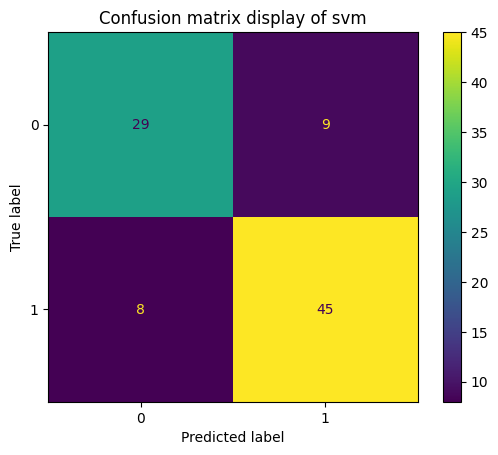

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, tune_lnr.predict(X_test))
plt.title('Confusion matrix display of svm')
plt.show()

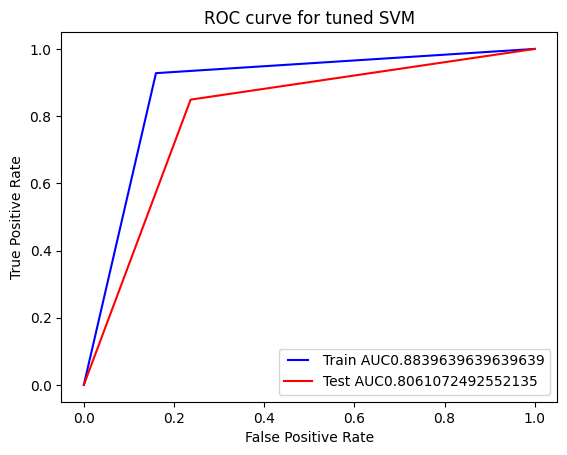

In [ ]:
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test,  tune_lnr.predict(X_test))
auc = metrics.roc_auc_score(y_test, tune_lnr.predict(X_test))
fpr_, tpr_, thr_ = metrics.roc_curve(y_train,  tune_lnr.predict(X_train))
auc_ = metrics.roc_auc_score(y_train, tune_lnr.predict(X_train))
from matplotlib.legend_handler import HandlerLine2D
#create ROC curve
line1, = plt.plot(fpr_, tpr_, 'b', label='Train AUC'+str(auc_))
line2, = plt.plot(fpr, tpr, 'r', label='Test AUC'+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC curve for tuned SVM')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.show()

array([[27, 15],
       [ 8, 41]])

In [ ]:
print(metrics.classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70        42
           1       0.73      0.84      0.78        49

    accuracy                           0.75        91
   macro avg       0.75      0.74      0.74        91
weighted avg       0.75      0.75      0.74        91



In [ ]:
SVC(C=0.1, gamma='auto', kernel='linear')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    heart['target'],
                                                    test_size=0.3, # 70% training and 30% test
                                                    random_state=10)


In [ ]:
clf_lnr = svm.SVC(C=0.1, gamma='auto',kernel='linear') # Linear Kernel

clf_lnr.fit(X_train, y_train)

SVC(C=0.1, gamma='auto', kernel='linear')

In [ ]:
pred_test_lnr = clf_lnr.predict(X_test)
print("Accuracy SVM (Linear Kernel):", metrics.accuracy_score(y_test, pred_test_lnr))

Accuracy SVM (Linear Kernel): 0.8131868131868132


In [ ]:
print(confusion_matrix(y_test, pred_test_lnr))

[[29  9]
 [ 8 45]]


In [ ]:
print(metrics.classification_report(y_test, pred_test_lnr))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        38
           1       0.83      0.85      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [ ]:

report= pd.DataFrame({'Prediction':['Yes','No'],'Accuracy': 0.84,'Precision': [0.84,0.83], 'Recall':[0.89,0.76]})
report

,Prediction,Accuracy,Precision,Recall
0,Yes,0.84,0.84,0.89
1,No,0.84,0.83,0.76


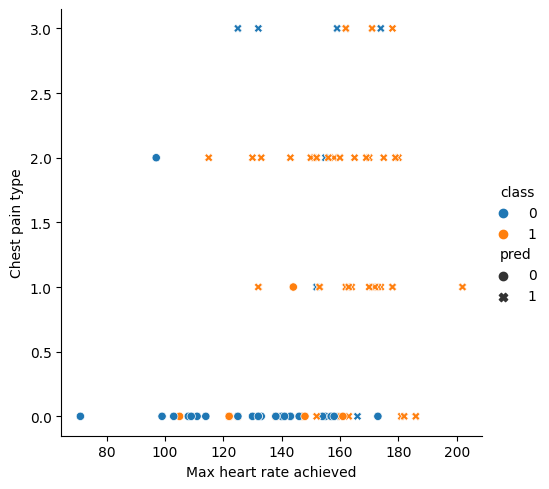

In [ ]:
test= X_test.loc[:,:]
test['class'] = y_test
test['pred'] = pred_test_lnr
sb.relplot(data=test, x='Max heart rate achieved', y='Chest pain type', hue='class', style='pred')